In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [20]:
x_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [52]:
classes=['airplane','automobiles','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
def plot_sample(x,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

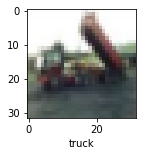

In [10]:
plot_sample(x_train,y_train,2)

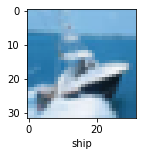

In [11]:
plot_sample(x_train,y_train,8)

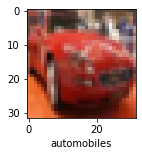

In [12]:
plot_sample(x_train,y_train,5)

In [13]:
x_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model.fit(x_train,y_train,epochs=1)

1563/1563 [==============================] - 98s 58ms/step - loss: 1.8120 - accuracy: 0.3516


In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification Report :\n', classification_report(y_test,y_pred_classes))

313/313 [==============================] - 5s 17ms/step
classification Report :
               precision    recall  f1-score   support

           0       0.60      0.33      0.43      1000
           1       0.48      0.52      0.50      1000
           2       0.52      0.03      0.05      1000
           3       0.33      0.28      0.30      1000
           4       0.35      0.40      0.37      1000
           5       0.34      0.36      0.35      1000
           6       0.52      0.34      0.41      1000
           7       0.27      0.73      0.40      1000
           8       0.57      0.47      0.52      1000
           9       0.46      0.53      0.49      1000

    accuracy                           0.40     10000
   macro avg       0.44      0.40      0.38     10000
weighted avg       0.44      0.40      0.38     10000



In [34]:
cnn = keras.Sequential([
#     input shape will we figured out by the system itself
    
#     cnn
    layers.Conv2D(filters=32 ,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32 ,kernel_size=(3,3) ,activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
#     dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])


In [20]:
# softmax is used of nermalization

# relu 
#1. 0.45
#2.0.67

# softmax
# 1.(0.45)/(0.45+0.67)
# 2.(0.67)/(0.45+0.67)

# 1+2 is alway be = 1

In [35]:
cnn.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [36]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 32s 18ms/step - loss: 2.0340 - accuracy: 0.2584
Epoch 2/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.6899 - accuracy: 0.3980
Epoch 3/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5151 - accuracy: 0.4574
Epoch 4/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4008 - accuracy: 0.5015
Epoch 5/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.3127 - accuracy: 0.5342


In [37]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 6ms/step - loss: 1.2796 - accuracy: 0.5530


[1.2796287536621094, 0.5529999732971191]

In [39]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

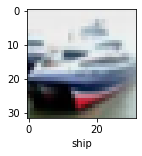

In [41]:
plot_sample(x_test,y_test,1)

In [42]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[5.53302187e-03, 1.49233046e-03, 3.74427661e-02, 5.10403514e-01,
        5.14630368e-03, 3.05332392e-01, 1.12132616e-01, 2.73010600e-03,
        5.10301534e-03, 1.46839488e-02],
       [2.09261939e-01, 2.58572727e-01, 2.62593944e-03, 5.27998898e-04,
        1.12797623e-03, 1.16098352e-04, 1.07704276e-04, 7.97271277e-05,
        3.44122440e-01, 1.83457419e-01],
       [2.45862648e-01, 1.62181646e-01, 1.39262788e-02, 9.43991635e-03,
        7.70054152e-03, 3.73493694e-03, 2.29230500e-03, 3.09379143e-03,
        4.39669073e-01, 1.12098902e-01],
       [3.24361026e-01, 2.69896053e-02, 9.25837830e-03, 2.06569326e-03,
        1.39915897e-03, 8.70137301e-04, 9.83634149e-04, 4.50044492e-04,
        6.06245697e-01, 2.73766555e-02],
       [2.21776753e-03, 6.00551779e-04, 1.05588011e-01, 1.15078464e-01,
        5.68123817e-01, 7.24919438e-02, 1.16245165e-01, 1.59361642e-02,
        2.31317035e-03, 1.40506076e-03]], dtype=float32)

In [45]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [46]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

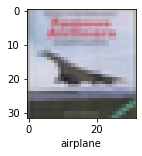

In [53]:
plot_sample(x_test,y_test,3)

In [54]:
classes[y_classes[3]]

'ship'

In [55]:
print('classification Report :\n', classification_report(y_test,y_classes))

classification Report :
               precision    recall  f1-score   support

           0       0.59      0.65      0.62      1000
           1       0.74      0.60      0.66      1000
           2       0.53      0.29      0.38      1000
           3       0.39      0.36      0.37      1000
           4       0.55      0.38      0.45      1000
           5       0.40      0.64      0.49      1000
           6       0.60      0.66      0.63      1000
           7       0.61      0.61      0.61      1000
           8       0.75      0.59      0.66      1000
           9       0.52      0.73      0.60      1000

    accuracy                           0.55     10000
   macro avg       0.57      0.55      0.55     10000
weighted avg       0.57      0.55      0.55     10000

